Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1631s 26s/step - accuracy: 0.6263 - loss: 2.9964 - val_accuracy: 0.8740 - val_loss: 0.2833
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1610s 26s/step - accuracy: 0.9110 - loss: 0.2074 - val_accuracy: 0.9000 - val_loss: 0.2338
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1570s 25s/step - accuracy: 0.9318 - loss: 0.1734 - val_accuracy: 0.9010 - val_loss: 0.2378
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1566s 25s/step - accuracy: 0.9570 - loss: 0.1108 - val_accuracy: 0.9140 - val_loss: 0.2152
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1555s 25s/step - accuracy: 0.9637 - loss: 0.0902 - val_accuracy: 0.9090 - val_loss: 0.2185


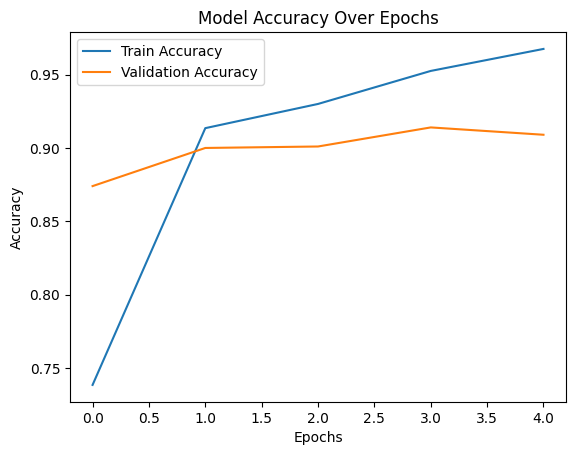

In [6]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import zipfile

# Step 2: Download and Extract Dataset
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Download the zip file
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=False)

# Extract it manually
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall('/tmp')

# Define correct paths for the train and validation directories
PATH = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'validation')

# Step 3: Preprocess Data using ImageDataGenerator
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
val_data = val_gen.flow_from_directory(val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary')

# Step 4: Load Pre-trained Model (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Step 5: Add Custom Layers on Top
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 6: Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
history = model.fit(train_data, validation_data=val_data, epochs=5)

# Step 8: Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
